# Objective is To Predict tumour if tumor is malignant or benign basis the given data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
%matplotlib inline

In [2]:
#load the dataset
data = pd.read_csv(r"C:\Users\Kshitij\Desktop\ML_work\Logistic Regression\Cancer.csv")

In [3]:
#check the head
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

We have one column with name 'Unnamed: 32' which does not have any value. Let's drop this column from the dataframe.

In [6]:
# remove the 'Unnamed: 32' column
data = data.drop('Unnamed: 32', axis=1)

In [7]:
#check data types of the columns
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

'diagnosis' is the non numeric categorical column which has 2 values 'M' for malignant and 'B' for benign. All other features are numeric so we dont need type conversion.

### Exploratory Data Analysis

In [8]:
#lets check no of occurances of our predicted varible
benign, malignant = data['diagnosis'].value_counts()
print(benign)
print(malignant)

357
212


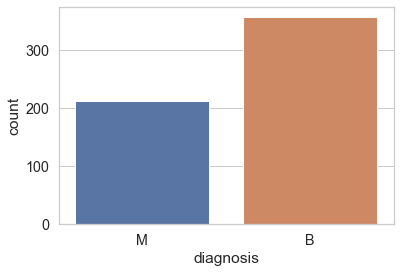

In [9]:
sns.countplot(data['diagnosis'])

In [10]:
#check % value of each predicted variable
print("Benign cells are",round(benign/len(data) * 100,2), "%")
print("Malignant cells are",round(malignant/len(data) * 100,2), "%")

#convert target column values to either 0 or 1
data.diagnosis.replace(('B', 'M'), (0, 1), inplace=True)

Benign cells are 62.74 %
Malignant cells are 37.26 %


Lets plot co relation plot to visualize the relationship between columns.

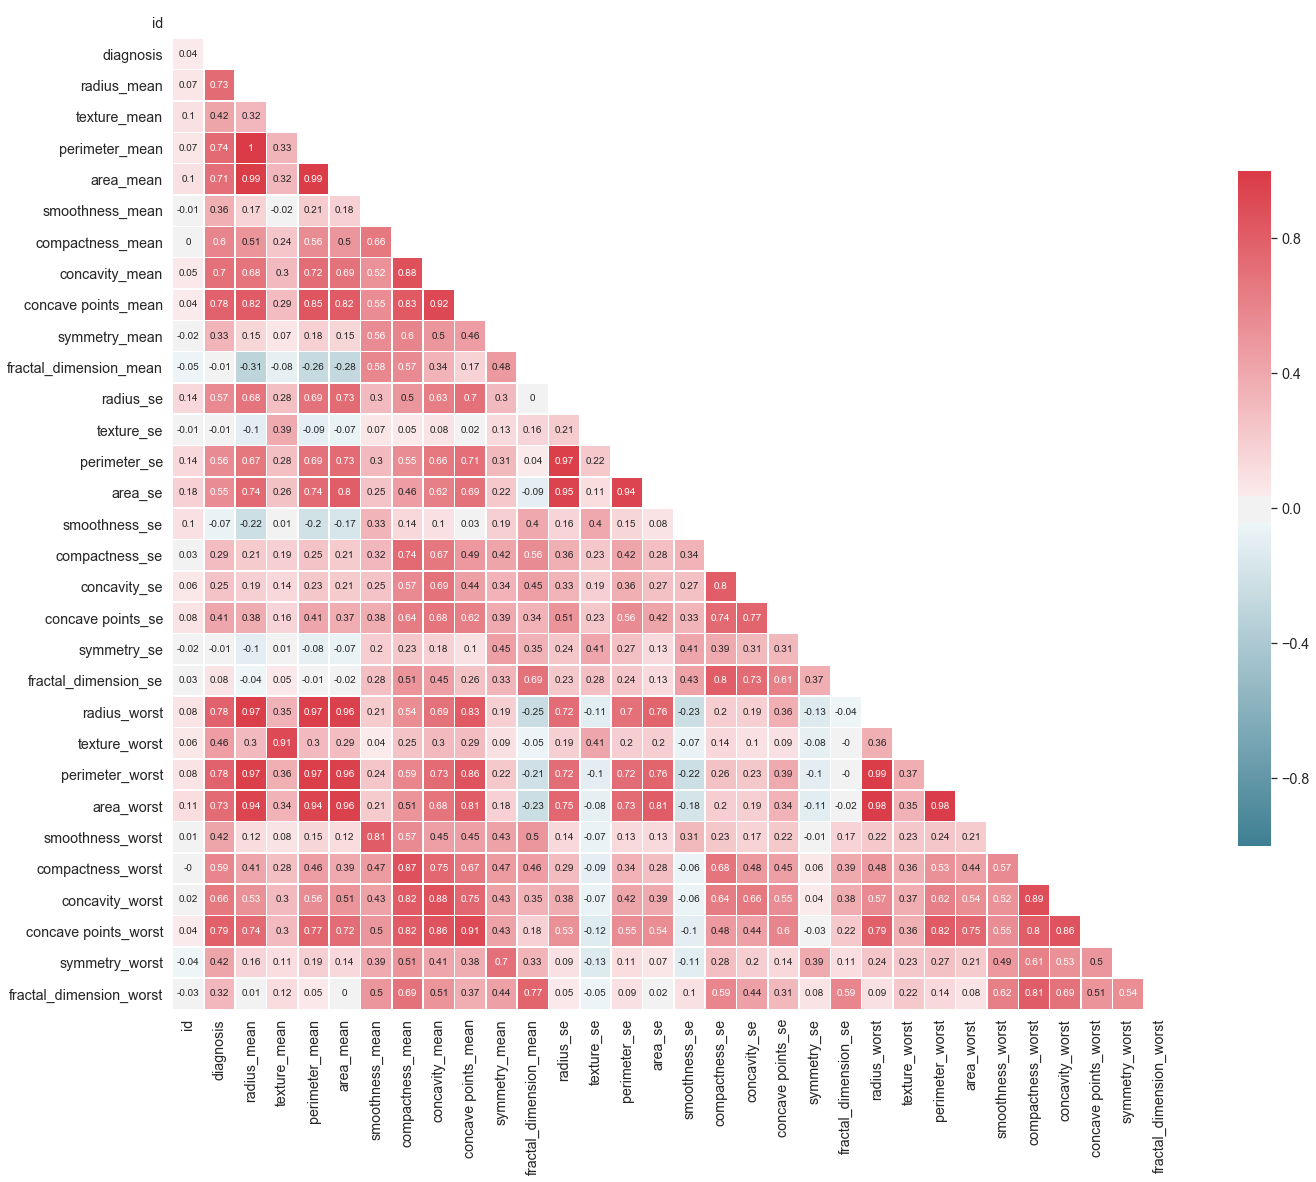

In [11]:
# Generate and visualize the correlation matrix
corr = data.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

From above plot we can see that we have high multicolinearity between area_mean, radiua_mean, perimeter_mean. We will pick only 1 column out of these 3. Lets pick 'radius' column.

We also have high corealtion between 'mean' columns and 'worst' column. Hence we will drop all the the columns with name 'worst'.

We also have multicolinearity between compactness, concavity and concave points. Lets select 'compactness' as this is simple to understand.

In [12]:
worst_columns = ['radius_worst', 'texture_worst', 
        'perimeter_worst','area_worst', 
        'smoothness_worst','compactness_worst', 
        'concavity_worst','concave points_worst', 
        'symmetry_worst', 'fractal_dimension_worst']

data = data.drop(worst_columns,axis=1)

#drop columns related to perimete and area
perimiter_area_columns = ['perimeter_mean','perimeter_se', 'area_mean', 'area_se']

data = data.drop(perimiter_area_columns, axis=1)

#drop concavity and concave points columns
data = data.drop(['concavity_mean','concavity_se', 'concave points_mean', 'concave points_se'],axis = 1)


In [13]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

In [14]:
#lets drop id column as well
data = data.drop('id',axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
diagnosis                 569 non-null int64
radius_mean               569 non-null float64
texture_mean              569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
radius_se                 569 non-null float64
texture_se                569 non-null float64
smoothness_se             569 non-null float64
compactness_se            569 non-null float64
symmetry_se               569 non-null float64
fractal_dimension_se      569 non-null float64
dtypes: float64(12), int64(1)
memory usage: 57.9 KB


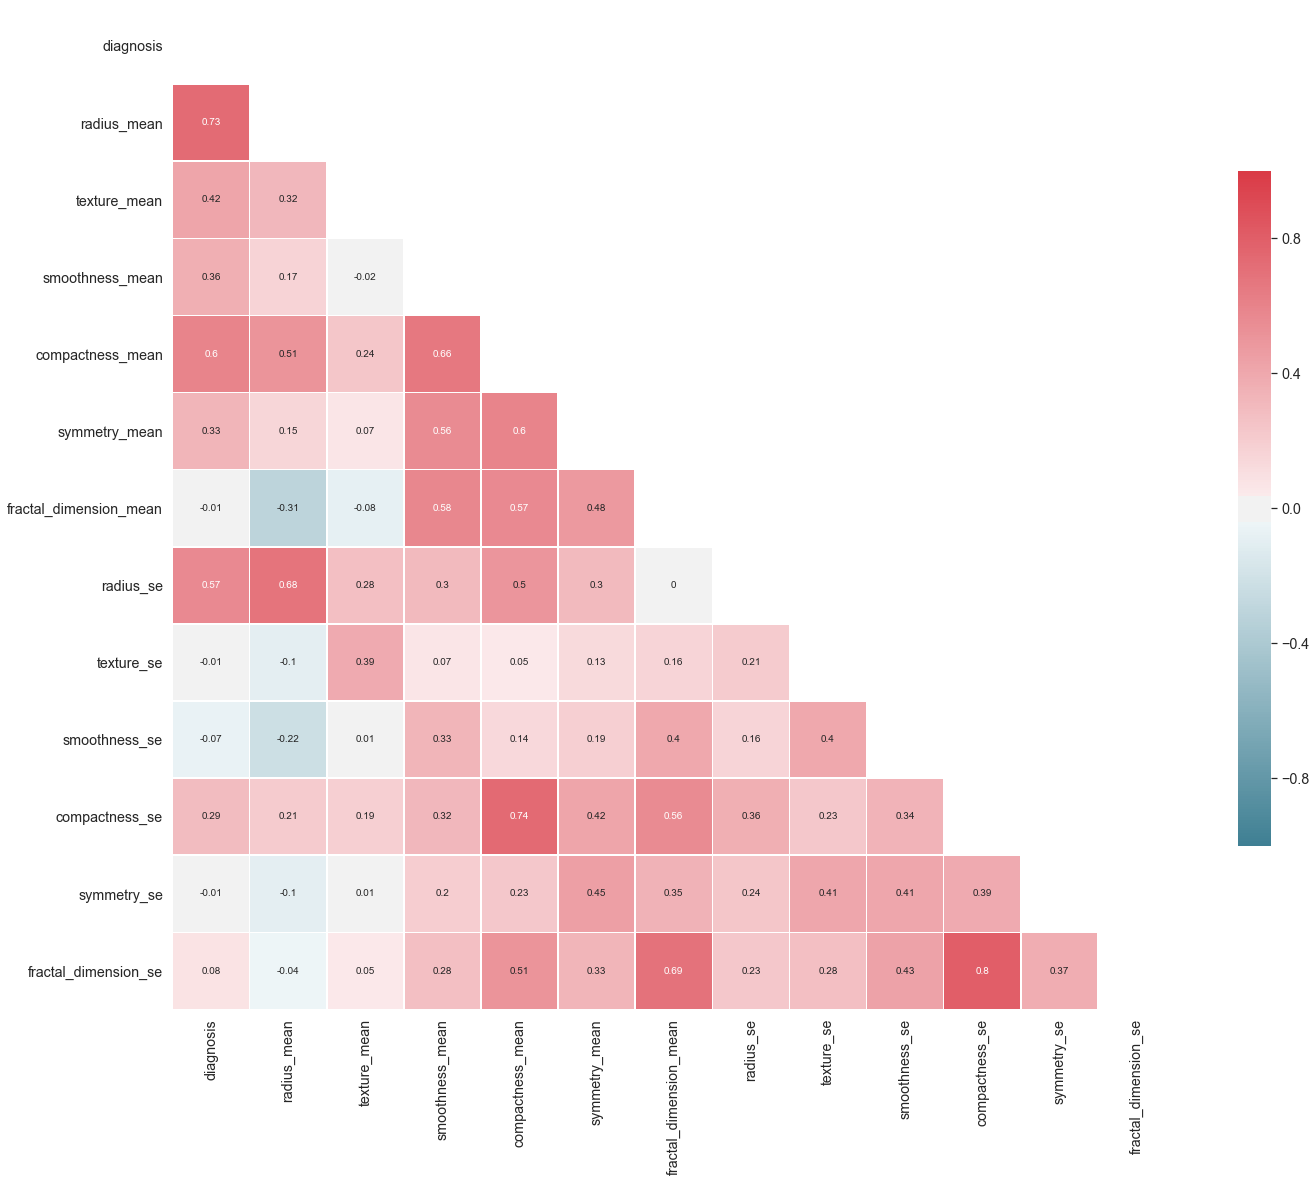

In [16]:
#lets look at co relation again

corr_new = data.corr().round(2)
mask = np.zeros_like(corr_new, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_new, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

### Logistic regression model

In [17]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
#split the data into training and testing set
X = data
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [19]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#using X_test , predict the target value
y_pred = clf.predict(X_test)

In [21]:
y_pred[1:6]

array([1, 0, 0, 1, 0], dtype=int64)

This model can take some unlabeled data and effectively assign each observation a probability ranging from 0 to 1. This is the key feature of a logistic regression model. However, for us to evaluate whether the predictions are accurate, the predictions must be encoded so that each instance can be compared directly with the labels in the test data. We can set a threshhold value of 0.5 to our predictions, assigning all values closer to 0 a label of "B" and assigniing all values closer to 1 a label of "M".

### Model Evaluation

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

print(metrics.accuracy_score(y_test, y_pred))

1.0


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        56

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [24]:
print(confusion_matrix(y_test, y_pred))

[[115   0]
 [  0  56]]


### ROC-AUC curve for binary classifier

ROC curves are typically used in binary classification to study the output of a classifier. ROC stands for Receiver Operating Characteristic (ROC) and AUC is Area under the curve

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc_score(y_test, y_pred)

1.0

In [26]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

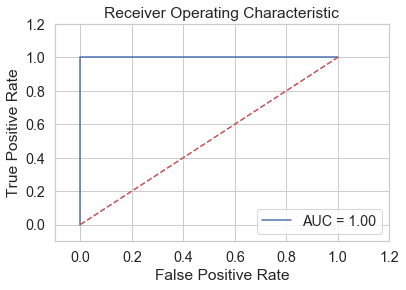

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Our model has accuracy of 1 This could indiacte that we have taken a spurious independent variable or the data is too perfect.

In real world this wont happen as the data won't be perfect. But we should try to get accuracy as high as possible to predict correctly. 